## Visualization

Visualization is a critical component in exploratory data analysis, as well as presentations and applications.

 During exploratory data analysis, you are usually working alone or in small groups and need to create plots quickly to help you better understand your data. It can help you identify outliers and missing data, or it can spark other questions of interest that will lead to further analysis and more visualizations. This type of visualization is usually not done with the end user in mind. It is strictly to help you better your current understanding. The plots don't have to be perfect.
 
 When preparing visualizations for a report or application, a different approach must be used. Attention to small details must be paid. In addition, you usually will have to narrow down all possible visualizations to only the select few that best represent your data. Good data visualizations have the viewer enjoying the experience of extracting information.
 
 ## Matplotlib
 
 The primary data visualization library in python is Matplotlib. We can also say that Matplotlib is the "grandfather" library of data visualization. It was created to replicate MatLab's (another programming language) plotting capabilities in Python. So if you happen to be familiar with matlab, matplotlib will feel natural to you. 
 
 Some of the major Pros of Matplotlib are:

*  Generally easy to get started for simple plots
* Support for custom labels and texts
* Great control of every element in a figure
* High-quality output in many formats
* Very customizable in general

Libraries like pandas and seaborn makes plotting extremely easy (as easy as calling a single function). But they don't create plots on their own, the make use of matplotlib under the hood to create plots. So, Although it is possible to create plots without ever directly running any matplotlib code, from time to time it will be necessary to use it to tweak finer plot details manually.

For many data scientists, the vast majority of their plotting commands will come directly from pandas or seaborn, which both rely completely on matplotlib to do the actual plotting. However, neither pandas nor seaborn offers a complete replacement for matplotlib, and occasionally you will need to use it directly.

### Anatomy of Matplotlib
![](images/mpt_anatomy.png)

Matplotlib uses a hierarchy of objects to display all of its plotting items in the output. This hierarchy is key to understanding everything about matplotlib. The Figure and Axes objects are the two main components of the hierarchy. The Figure object is at the top of the hierarchy. It is the container for everything that will be plotted. Contained within the Figure is one or more Axes object(s). The Axes is the primary object that you will interact with when using matplotlib and can be more commonly thought of as the actual plotting surface. The Axes contains the x/y axis, points, lines, markers, labels, legends, and any other useful item that is plotted.

### Importing

In [1]:
import matplotlib.pyplot as plt

This is only meant to be used with jupyter notebook. Matplotlib can use many different back-ends to create plots and this **inline magic** tells matplotlib which one to use.

In [2]:
%matplotlib inline

If you are using another editor, you'll use: **plt.show()** at the end of all your plotting commands to have the figure pop up in another window. 

### Basic Example

In [3]:
import numpy as np

In [4]:
x = np.linspace(0,5,11)
y = x**2

In [5]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [6]:
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

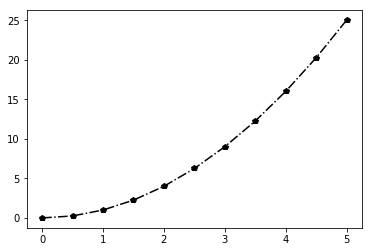

In [13]:
plt.plot(x,y,'-.kp')

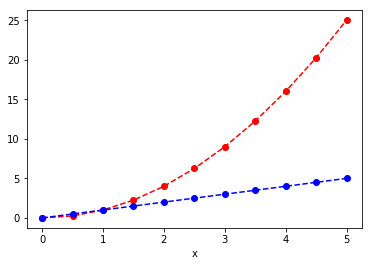

In [8]:
plt.plot(x,y, 'ro--',x,x, 'bo--') #multiple graphs can be drawn using the same line 
plt.xlabel('x')

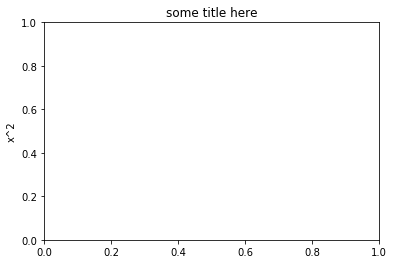

In [9]:
plt.ylabel('x^2')
plt.title('some title here')

### Subplots

Text(0.5, 1.0, 'green')

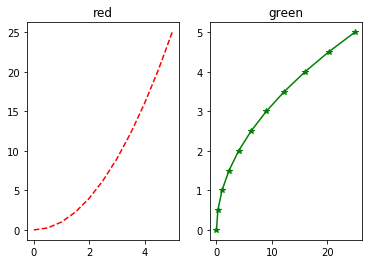

In [14]:
# plt.subplot(nrows, ncols, plot_number)
plt.subplot(1,2,1)
plt.plot(x, y, 'r--')
plt.title('red')
plt.subplot(1,2,2)
plt.plot(y, x, 'g*-')
plt.title('green')

## Object-oriented guide to matplotlib
Matplotlib provides **two** distinct interfaces for users to develop plots with. The **stateful interface** makes all of its calls directly with the pyplot module. This interface is called stateful because matplotlib implicitly keeps track of the current state of the plotting environment. Whenever a plot is created in the stateful interface, matplotlib finds the current Figure or current Axes and makes changes to it. This approach is fine to plot a few things quickly but can become unwieldy when dealing with multiple Figures and Axes. 

Matplotlib also offers a **stateless**, or **object-oriented**, interface in which you explicitly use variables that reference specific plotting objects. Each variable can then be used to change some property of the plot. The object-oriented approach is explicit, and you are always aware of exactly what object is being modified. 

Unfortunately, having both options has lead to lots of confusion, and matplotlib has a reputation for being difficult to learn. The documentation has examples using both approaches. Tutorials, blog posts, and Stack Overflow posts abound on the web, perpetuating the confusion.

### Introduction to the Object Oriented Method

The main idea in using the more formal Object Oriented method is to create figure objects and then just call methods or attributes off of that object. This approach is nicer when dealing with a canvas that has multiple plots on it. 

To begin we create a figure instance. Then we can add axes to that figure:

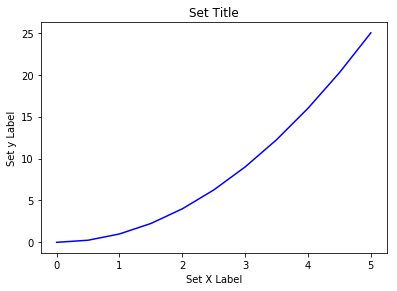

In [17]:
# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
axes.plot(x, y, 'b')
axes.set_xlabel('Set X Label') # Notice the use of set_ to begin methods
axes.set_ylabel('Set y Label')
axes.set_title('Set Title')

Code is a little more complicated, but the advantage is that we now have full control of where the plot axes are placed, and we can easily add more than one axis to the figure:

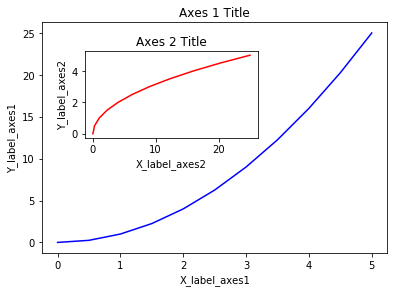

In [56]:
# Creates blank canvas
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# Larger Figure Axes 1
axes1.plot(x, y, 'b')
axes1.set_xlabel('X_label_axes1')
axes1.set_ylabel('Y_label_axes1')
axes1.set_title('Axes 1 Title')

# Insert Figure Axes 2
axes2.plot(y, x, 'r')
axes2.set_xlabel('X_label_axes2')
axes2.set_ylabel('Y_label_axes2')
axes2.set_title('Axes 2 Title');

### Subplots with Object oriented interface

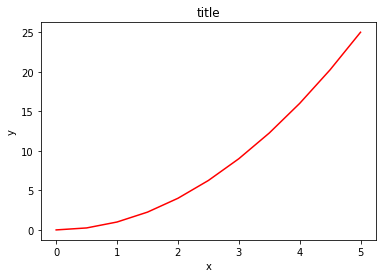

In [19]:
# Use similar to plt.figure() except use tuple unpacking to grab fig and axes
fig, axes = plt.subplots() # notice its subplots() not subplot() [from stateful interface]

# Now use the axes object to add stuff to plot
axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

Then you can specify the number of rows and columns when creating the subplots() object:

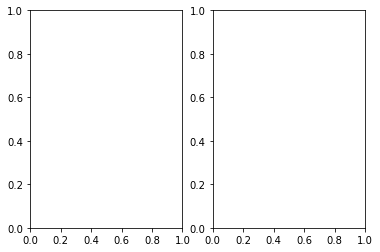

In [20]:
fig, axes = plt.subplots(nrows=1,ncols=2)

In [21]:
# Axes is an array of axes to plot on
axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FD791F6588>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001FD792BF048>], dtype=object)

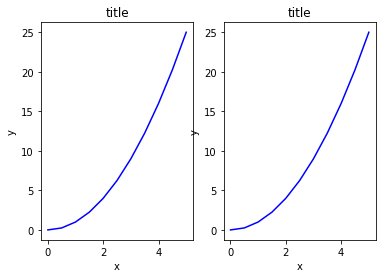

In [22]:
# you can iterate through this array
for ax in axes:
    ax.plot(x, y, 'b')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

# Display the figure object    
fig

A common issue with matplolib is overlapping subplots or figures. We ca use **fig.tight_layout()** or **plt.tight_layout()** method, which automatically adjusts the positions of the axes on the figure canvas so that there is no overlapping content:

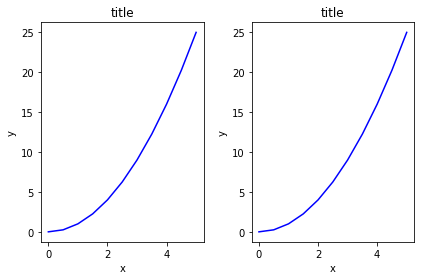

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'b')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

# Display the figure object    
fig
fig.tight_layout()

### Figure size, aspect ratio and DPI

Matplotlib allows the aspect ratio, DPI and figure size to be specified when the Figure object is created. You can use the `figsize` and `dpi` keyword arguments. 
* `figsize` is a tuple of the width and height of the figure in inches
* `dpi` is the dots-per-inch (pixel per inch). 

For example:

In [57]:
fig = plt.figure(figsize=(8,4), dpi=100)

The same arguments can also be passed to layout managers, such as the *subplots* function:

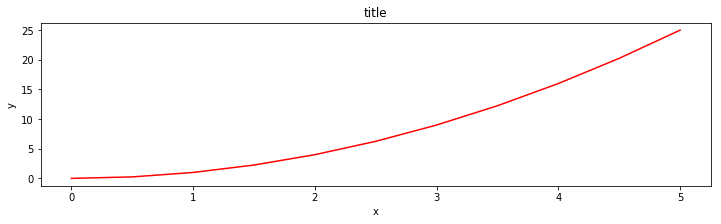

In [58]:
fig, axes = plt.subplots(figsize=(12,3))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

## Saving figures
Matplotlib can generate high-quality output in a number formats, including PNG, JPG, EPS, SVG, PGF and PDF. 

To save a figure to a file we can use the savefig method in the Figure class:

In [27]:
fig.savefig("filename.png")

Here we can also optionally specify the DPI and choose between different output formats:

In [28]:
fig.savefig("filename.png", dpi=200)

____
## Legends, labels and titles

Now that we have covered the basics of how to create a figure canvas and add axes instances to the canvas, let's look at how decorate a figure with titles, axis labels, and legends.

#### Figure title

A title can be added to each axis instance in a figure. To set the title, use the *set_title* method in the axes instance:

In [29]:
ax.set_title("title");

#### Axis label

Similarly, with the methods *set_xlabel* and *set_ylabel*, we can set the labels of the X and Y axes:

In [30]:
ax.set_xlabel("x")
ax.set_ylabel("y");

#### Legends

You can use the **label="label text"** keyword argument when plots or other objects are added to the figure, and then using the **legend** method without arguments to add the legend to the figure:

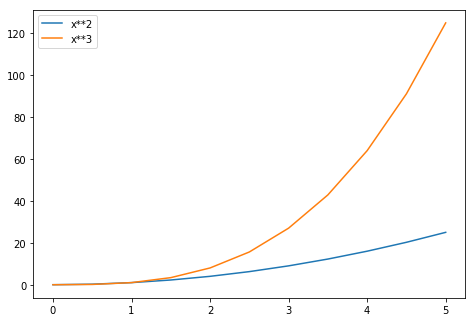

In [31]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.plot(x, x**2, label="x**2")
ax.plot(x, x**3, label="x**3")
ax.legend()

#### Line color and markers

To change the *line width*, we can use the **linewidth** or **lw** keyword argument. The *line style* can be selected using the **linestyle** or **ls** keyword arguments:

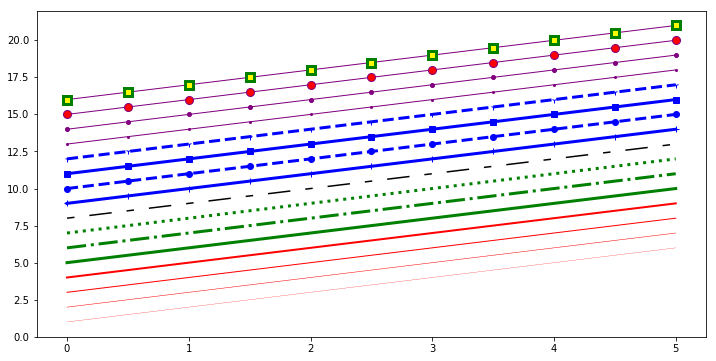

In [32]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="red", linewidth=0.25)
ax.plot(x, x+2, color="red", linewidth=0.50)
ax.plot(x, x+3, color="red", linewidth=1.00)
ax.plot(x, x+4, color="red", linewidth=2.00)

# possible linestype options ‘-‘, ‘–’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="green", lw=3, linestyle='-')
ax.plot(x, x+6, color="green", lw=3, ls='-.')
ax.plot(x, x+7, color="green", lw=3, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="blue", lw=3, ls='-', marker='+')
ax.plot(x, x+10, color="blue", lw=3, ls='--', marker='o')
ax.plot(x, x+11, color="blue", lw=3, ls='-', marker='s')
ax.plot(x, x+12, color="blue", lw=3, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=3, markeredgecolor="green");

#### Plot Range
We can configure the ranges of the axes using the **set_ylim** and **set_xlim** methods in the axis object, or axis('tight') for automatically getting "tightly fitted" axes ranges:

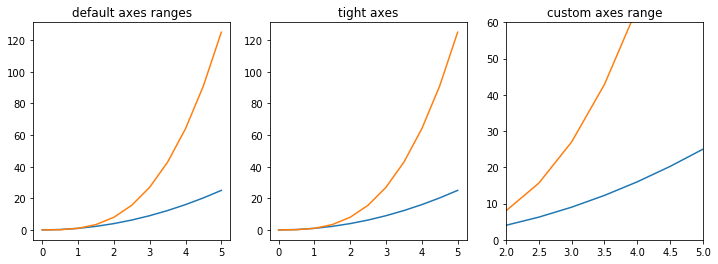

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range");

### Special plots

There are many specialized plots we can create, such as barplots, histograms, scatter plots, and much more. Most of these type of plots we will actually create using seaborn, a statistical plotting library for Python. But here are a few examples of these type of plots:

TypeError: ufunc 'sqrt' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

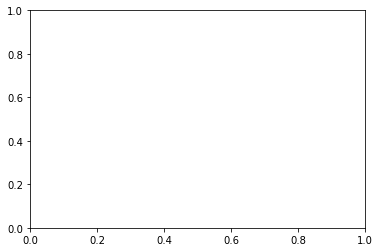

In [59]:
plt.scatter(x,y, 'r')

(array([  9.,  12.,  15.,   5.,  11.,   7.,  13.,   8.,  12.,   8.]),
 array([   1. ,  100.5,  200. ,  299.5,  399. ,  498.5,  598. ,  697.5,
         797. ,  896.5,  996. ]),
 <a list of 10 Patch objects>)

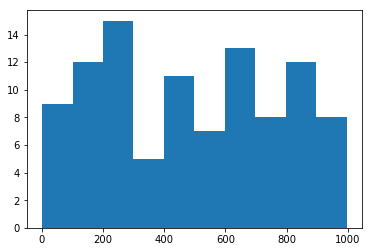

In [35]:
from random import sample
data = sample(range(1, 1000), 100)
plt.hist(data)

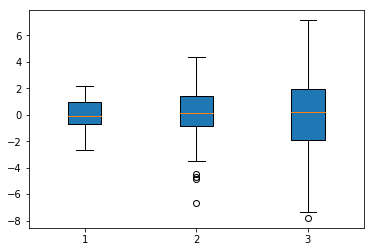

In [36]:
data = [np.random.normal(0, std, 100) for std in range(1, 4)]

# rectangular box plot
plt.boxplot(data,vert=True,patch_artist=True);   

## Further Reading

* http://matplotlib.org/gallery.html - A large gallery showcaseing various types of plots matplotlib can create. Highly recommended! 
* http://www.loria.fr/~rougier/teaching/matplotlib - A good matplotlib tutorial.
* http://scipy-lectures.github.io/matplotlib/matplotlib.html - Another good matplotlib reference.
* https://github.com/matplotlib/AnatomyOfMatplotlib - Anatomy of Matplotlib.